In [11]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def dms_to_radians(dms_str):
    parts = re.split(r'[°\'\"]', dms_str)
    degrees = int(parts[0])
    minutes = int(parts[1]) if len(parts) > 1 and parts[1] else 0
    seconds = int(parts[2]) if len(parts) > 2 and parts[2] else 0
    
    decimal_degrees = degrees + minutes / 60 + seconds / 3600
    radians = math.radians(decimal_degrees)
    return radians

data = {
    'λ (nm)': [404.66, 435.84, 496.16, 546.07, 576.96],
    'θ': ['320°12\'', '320°30\'', '320°53\'', '321°13\'', '321°20\''],
    'θ\'': ['140°12\'', '140°30\'', '140°52\'', '141°11\'', '141°18\''],
    'δ': ['39°48\'', '39°30\'', '39°07\'', '38°45\'', '38°41\'']
}

df = pd.DataFrame(data)

df['δ (rad)'] = df['δ'].apply(dms_to_radians)

n_0 = 1.00027
A_rad = dms_to_radians('60°1\'')

df['n_λ'] = n_0 / math.sin(A_rad / 2) * df['δ (rad)'].apply(lambda x: math.sin((x + A_rad) / 2))


c:\Users\Lanto\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


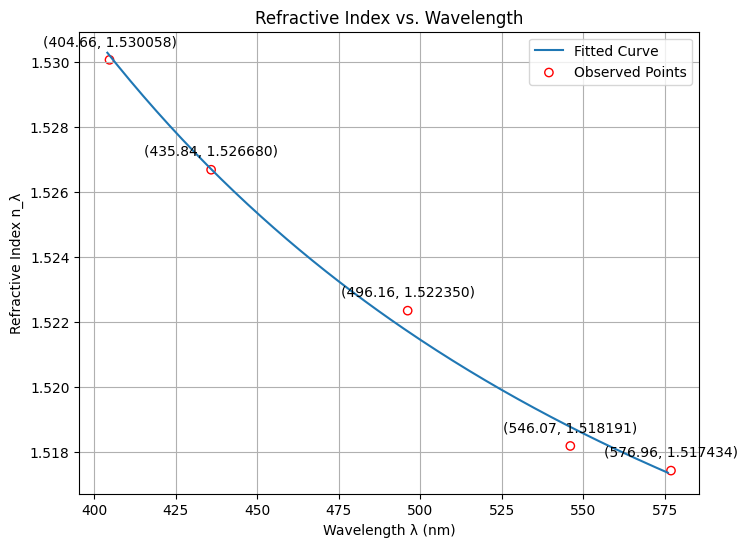

Fitted Parameters: A=1.504870, B=4146.749084, C=1.000000


In [12]:
def dispersion_equation(wavelength, A, B, C):
    return A + B / wavelength**2 + C / wavelength**4

popt, _ = curve_fit(dispersion_equation, df['λ (nm)'], df['n_λ'])

A, B, C = popt

wavelength_range = pd.Series(range(int(df['λ (nm)'].min()), int(df['λ (nm)'].max()) + 1))
fitted_n = dispersion_equation(wavelength_range, A, B, C)

plt.figure(figsize=(8, 6))
plt.plot(wavelength_range, fitted_n, label='Fitted Curve')
plt.scatter(df['λ (nm)'], df['n_λ'], color='red', marker='o', facecolors='none', label='Observed Points')

for i, row in df.iterrows():
    plt.annotate(f"({row['λ (nm)']}, {row['n_λ']:.6f})", (row['λ (nm)'], row['n_λ']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Wavelength λ (nm)')
plt.ylabel('Refractive Index n_λ')
plt.title('Refractive Index vs. Wavelength')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted Parameters: A={A:.6f}, B={B:.6f}, C={C:.6f}")

In [13]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def dms_to_radians(dms_str):
    parts = re.split(r'[°\'\"]', dms_str)
    degrees = int(parts[0])
    minutes = int(parts[1]) if len(parts) > 1 and parts[1] else 0
    seconds = int(parts[2]) if len(parts) > 2 and parts[2] else 0
    
    decimal_degrees = degrees + minutes / 60 + seconds / 3600
    radians = math.radians(decimal_degrees)
    return radians

data = {
    '测量序号': [1, 2, 3],
    'δ_i': ['39°7\'30"', '38°46\'30"', '38°46\'30"']
}

df = pd.DataFrame(data)

df['δ_i (radians)'] = df['δ_i'].apply(dms_to_radians)
A=math.radians(60+1/60)
print(df)

   测量序号        δ_i  δ_i (radians)
0     1   39°7'30"       0.682860
1     2  38°46'30"       0.676751
2     3  38°46'30"       0.676751


In [18]:
x=math.radians(1/60)
y=math.degrees(0.00031858)